In [1]:
"""価値反復法　報酬Rt t:各ステップ　
   報酬和Gt=Rt+1+Rt+2... 未来に得られる報酬
   これらは割引して捉える　
   γ:割引率
   Gt=Rt+1+γRt+2+γ**2*Rt+3+...
   
   
   価値概念：行動価値、状態価値の二つ
   ゴールにつくとRt=1
   
   行動価値：Q
   state=S7,action='right=1ならばRt+1=1
   =>行動価値関数Q(s,a)<polocy dependence>を用いると
   Q(s=7,a=1)=1
   
   state=S7,action='up'=0
   2step分lossする
   Q(s=7,a=0)=γ**2*1
   
   状態価値：V
   state=S7=>V(s=7)=1
   state=S4=>V(s=4)=γ*1 or V(s=4)=Rt+1+γ*V(s=7)
   ただしS8以外ではRt+1=0であることに注意
   
   一般化
   V(s)=max(R(s,a)+γ*V(s(s,a)))"""

"価値反復法\u3000報酬Rt t:各ステップ\u3000\n   報酬和Gt=Rt+1+Rt+2... 未来に得られる報酬\n   これらは割引して捉える\u3000\n   γ:割引率\n   Gt=Rt+1+γRt+2+γ**2*Rt+3+...\n   \n   \n   価値概念：行動価値、状態価値の二つ\n   ゴールにつくとRt=1\n   \n   行動価値：Q\n   state=S7,action='right=1ならばRt+1=1\n   =>行動価値関数Q(s,a)<polocy dependence>を用いると\n   Q(s=7,a=1)=1\n   \n   state=S7,action='up'=0\n   2step分lossする\n   Q(s=7,a=0)=γ**2*1\n   \n   状態価値：V\n   state=S7=>V(s=7)=1\n   state=S4=>V(s=4)=γ*1 or V(s=4)=Rt+1+γ*V(s=7)\n   ただしS8以外ではRt+1=0であることに注意\n   \n   一般化\n   V(s)=max(R(s,a)+γ*V(s(s,a)))"

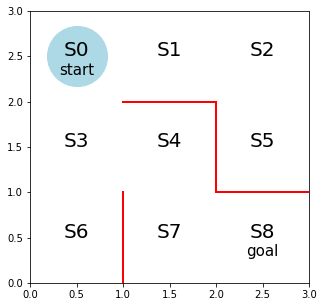

In [16]:
#sarsa
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x=np.arange(0,4,1)
grid=np.array([x,x])

plt.figure(figsize=(5,5))
ax=plt.gca()
plt.xlim(0,3)
plt.ylim(0,3)

#迷路の壁を作成
plt.plot((grid[0][1],grid[1][1]),(grid[0][1],grid[1][0]),c='red',linewidth=2)
plt.plot((grid[0][1],grid[1][2]),(grid[0][2],grid[1][2]),c='red',linewidth=2)
plt.plot((grid[0][2],grid[1][2]),(grid[0][2],grid[1][1]),c='red',linewidth=2)
plt.plot((grid[0][3],grid[1][2]),(grid[0][1],grid[1][1]),c='red',linewidth=2)

#迷路の状態を明示
plt.text(0.5,0.5,'S6',size=20,ha='center')
plt.text(0.5,1.5,'S3',size=20,ha='center')
plt.text(0.5,2.5,'S0',size=20,ha='center')
plt.text(0.5,2.3,'start',size=15,ha='center')
plt.text(1.5,0.5,'S7',size=20,ha='center')
plt.text(1.5,1.5,'S4',size=20,ha='center')
plt.text(1.5,2.5,'S1',size=20,ha='center')
plt.text(2.5,0.5,'S8',size=20,ha='center')
plt.text(2.5,0.3,'goal',size=15,ha='center')
plt.text(2.5,1.5,'S5',size=20,ha='center')
plt.text(2.5,2.5,'S2',size=20,ha='center')

#start mark
line,=ax.plot(0.5,2.5,marker='o',color='lightblue',markersize=60)

plt.show()

#policy array
theta_0=np.array([[np.nan,1,1,np.nan],
                  [np.nan,np.nan,1,1],
                  [np.nan,1,np.nan,1],
                  [1,1,1,np.nan],
                  [np.nan,1,np.nan,np.nan],
                  [1,np.nan,np.nan,np.nan],
                  [1,np.nan,np.nan,np.nan],
                  [1,np.nan,1,np.nan]
                  ])



In [17]:
#行動価値関数Q(s,a)をarray表現
#Qの初期化
a,b=theta_0.shape
Q=np.random.rand(a,b)*theta_0
print(Q)

[[        nan  0.72907246  0.86863874         nan]
 [        nan         nan  0.8021949   0.44032879]
 [        nan  0.00341353         nan  0.6227598 ]
 [ 0.38884061  0.55857319  0.28816602         nan]
 [        nan  0.35915519         nan         nan]
 [ 0.83762927         nan         nan         nan]
 [ 0.99302353         nan         nan         nan]
 [ 0.1847708          nan  0.43250653         nan]]


In [39]:
#一定の確率εでランダムに行動し、1-εでQが最大になる行動を選択

#policy_to_probの実装
def policy_to_prob(theta):
    s,t=theta.shape
    prob_array=np.zeros([s,t])
    
    for i in range(s):
        prob_array[i,:]=theta[i,:]/np.nansum(theta[i,:])
        
    #np.nanは行動をとれないので確率0
    prob_array=np.nan_to_num(prob_array)
    
    return prob_array

#greedy
epsilon=0.3
def eps_greedy(Q,prob_array,now_state,epsilon):
    direction=['up','down','right','left']
    
    #ランダムに行動をする
    if np.random.rand()<epsilon:
        next_direction=np.random.choice(direction,p=prob_array[now_state,:])
    #それ以外はQを最大にする方向の行動をとる
    else:
        next_direction=direction[np.nanargmax(Q[now_state,:])]
        
    if next_direction==direction[0]:
        action=0
        next_state=now_state-3
    elif next_direction==direction[1]:
        action=1
        next_state=now_state+3
    elif next_direction==direction[2]:
        action=2
        next_state=now_state+1
    elif next_direction==direction[3]:
        action=3
        next_state=now_state-1
        
    return [action,next_state]

prob_array=policy_to_prob(theta_0)
now_state=0
[action,new_state]=eps_greedy(theta_0,prob_array,now_state,epsilon=0.3)
print('action',action)
print('new state',new_state)

action 1
new state 3


In [40]:
#勾配方策方がsarsaアルゴリズムに変換
lr=0.1
a,b=theta_0.shape
#行動価値関数
Q=np.random.rand(a,b)*theta_0
#状態価値関数
V=np.nanmax(Q,axis=1)

Q_old=Q.copy()

now_state=0
r=0
gamma=0.8
prob_array=policy_to_prob(theta_0)
[action,new_state]=eps_greedy(theta_0,prob_array,now_state,epsilon=0.3)
action_next=2

if new_state==8:
    Q[now_state,action]=Q[now_state,action]+lr*(r-Q[now_state,action])
else:
    Q[now_state,action]=Q[now_state,action]+lr*(r+gamma*Q[new_state,action_next]-Q[now_state,action])

new_V=np.nanmax(Q,axis=1)
print(Q_old)
print(Q)
print(new_V)

[[        nan  0.03095243  0.18606583         nan]
 [        nan         nan  0.65554367  0.02934499]
 [        nan  0.46258361         nan  0.89900432]
 [ 0.84707658  0.01515099  0.21922183         nan]
 [        nan  0.77824764         nan         nan]
 [ 0.64273377         nan         nan         nan]
 [ 0.3224585          nan         nan         nan]
 [ 0.4845942          nan  0.79979357         nan]]
[[        nan  0.04539493  0.18606583         nan]
 [        nan         nan  0.65554367  0.02934499]
 [        nan  0.46258361         nan  0.89900432]
 [ 0.84707658  0.01515099  0.21922183         nan]
 [        nan  0.77824764         nan         nan]
 [ 0.64273377         nan         nan         nan]
 [ 0.3224585          nan         nan         nan]
 [ 0.4845942          nan  0.79979357         nan]]
[ 0.18606583  0.65554367  0.89900432  0.84707658  0.77824764  0.64273377
  0.3224585   0.79979357]


In [41]:
#sarsa algorithmを関数化
def Sarsa(now_state,now_action,next_state,next_action,Q,lr,r,gamma):
    if next_state==8:
        Q[now_state,now_action]=Q[now_state,now_action]+lr*(r-Q[now_state,now_action])
    else:
        Q[now_state,now_action]=Q[now_state,now_action]+lr*(r+gamma*Q[next_state,next_action]-Q[now_state,now_action])
        
    return Q


In [42]:
#goal関数
def get_goal(Q,epsilon,lr,gamma,prob_array):
    now_state=0
    s_a_history=[[now_state,np.nan]]
    
    while True:
        [now_action,next_state]=eps_greedy(Q,prob_array,now_state,epsilon)
        s_a_history[-1][1]=now_action
        
        s_a_history.append([next_state,np.nan])
        
        if next_state==8:
            #goalをしたら報酬をもらえて次が動けなくなる
            r=1
            next_action=np.nan
        else:
            r=0
            [next_action,_]=eps_greedy(Q,prob_array,next_state,epsilon)
            
        #価値関数を更新
        Q=Sarsa(now_state,now_action,next_state,next_action,Q,lr,r,gamma)
        
        #終了判定
        if next_state==8:
            break
        else:
            now_state=next_state
            
    return [s_a_history,Q]


In [45]:
#迷路を解く
prob_array=policy_to_prob(theta_0)
a,b=theta_0.shape
#行動価値関数初期化
Q=np.random.rand(a,b)*theta_0
#状態価値関数初期化
V=np.nanmax(Q,axis=1)
epsilon=0.5#ランダム確率
lr=0.1#学習率
gamma=0.9#ステップ割引率

is_continue=True#学習を続けるかを判定
step=1

while is_continue:
    print('%d step'%step)
    
    epsilon=epsilon/2
    [s_a_history,Q]=get_goal(Q,epsilon,lr,gamma,prob_array)
    
    new_V=np.nanmax(Q,axis=1)
    error=np.sum(np.abs(new_V-V))
    print(error)
    
    V=new_V
    
    print('labyrince is solved %d times required'%(len(s_a_history)-1))
    
    step+=1
    #stepが100を超えたらloopを抜ける
    #もしくはerrorがある値より小さくなったら終了としても良い
    if step>100:
        break
    
    



1 step
1.19235522381
labyrince is solved 64 times required
2 step
0.283468215643
labyrince is solved 40 times required
3 step
0.227387547205
labyrince is solved 34 times required
4 step
0.422669478019
labyrince is solved 130 times required
5 step
0.0879711727578
labyrince is solved 44 times required
6 step
0.0489300765045
labyrince is solved 4 times required
7 step
0.0425006917322
labyrince is solved 4 times required
8 step
0.0369390307694
labyrince is solved 4 times required
9 step
0.032375424952
labyrince is solved 4 times required
10 step
0.0293213631409
labyrince is solved 4 times required
11 step
0.0271169179751
labyrince is solved 4 times required
12 step
0.0250717058602
labyrince is solved 4 times required
13 step
0.0233706491665
labyrince is solved 4 times required
14 step
0.0218313202785
labyrince is solved 4 times required
15 step
0.0204363242637
labyrince is solved 4 times required
16 step
0.0191698175508
labyrince is solved 4 times required
17 step
0.018017454275
labyrince 